In [2]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image
import pandas as pd
import torchvision
import pycocotools
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#if not os.path.exists('MaskedFace.zip'):
   # !wget --no-check-certificate https://empslocal.ex.ac.uk/people/staff/ad735/ECMM426/MaskedFace.zip
!unzip -q MaskedFace.zip


In [11]:
pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Archive:  MaskedFace.zip
caution: filename not matched:  --directory
caution: filename not matched:  MaskedFace/train/
Archive:  MaskedFace.zip
caution: filename not matched:  --directory
caution: filename not matched:  MaskedFace/val/
mv: cannot stat 'MaskedFace/train/*': No such file or directory
mv: cannot stat 'MaskedFace/val/*': No such file or directory
rm: cannot remove 'MaskedFace/test/': No such file or directory


In [12]:

class_str2num = {'with_mask': 1, 'without_mask': 2, 'mask_weared_incorrect': 3}
class_num2str = {v: k for k, v in class_str2num.items()}
#fh=open("MaskedFace/",'r')
antns = sorted([f for f in os.listdir('train/') if f.endswith('.xml')])
print(antns)

['mask-000.xml', 'mask-001.xml', 'mask-002.xml', 'mask-003.xml', 'mask-004.xml', 'mask-005.xml', 'mask-006.xml', 'mask-007.xml', 'mask-008.xml', 'mask-010.xml', 'mask-012.xml', 'mask-013.xml', 'mask-014.xml', 'mask-015.xml', 'mask-016.xml', 'mask-017.xml', 'mask-018.xml', 'mask-020.xml', 'mask-021.xml', 'mask-022.xml', 'mask-024.xml', 'mask-025.xml', 'mask-026.xml', 'mask-027.xml', 'mask-029.xml', 'mask-030.xml', 'mask-031.xml', 'mask-033.xml', 'mask-034.xml', 'mask-035.xml', 'mask-037.xml', 'mask-038.xml', 'mask-039.xml', 'mask-040.xml', 'mask-044.xml', 'mask-045.xml', 'mask-046.xml', 'mask-048.xml', 'mask-049.xml', 'mask-050.xml', 'mask-051.xml', 'mask-052.xml', 'mask-054.xml', 'mask-055.xml', 'mask-056.xml', 'mask-059.xml', 'mask-060.xml', 'mask-061.xml', 'mask-062.xml', 'mask-063.xml']


In [13]:
import xml.etree.ElementTree as ET
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    labels = []
    for boxes in root.iter('object'):
        filename = root.find('filename').text
        ymin, xmin, ymax, xmax = None, None, None, None
        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)
        box = [xmin, ymin, xmax, ymax]
        bboxes.append(box)
        labels.append(int(class_str2num[boxes.find("name").text]))
    return filename, bboxes, labels

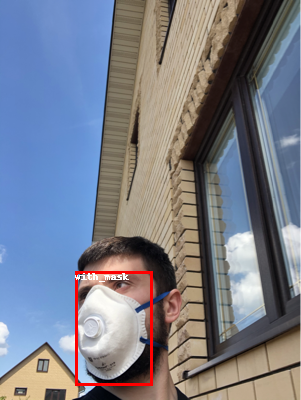

In [14]:
from PIL import Image, ImageDraw
idx = np.random.randint(len(antns))
filename, boxes, labels = parse_xml(os.path.join('train/', antns[idx]))
image = Image.open(os.path.join('train/',filename))
draw = ImageDraw.Draw(image)
for i, ibox in enumerate(boxes):
    draw.rectangle([(ibox[0], ibox[1]), (ibox[2], ibox[3])], outline='red', width=3)
    draw.text((ibox[0], ibox[1]), text = class_num2str[labels[i]])
image

In [ ]:
pip install unzip

In [15]:

!mv vision-f40c8df02c197d1a9e194210e40dee0e6a6cb1c3/ vision/
!cp vision/references/detection/utils.py ./
!cp vision/references/detection/transforms.py ./
!cp vision/references/detection/coco_eval.py ./
!cp vision/references/detection/engine.py ./
!cp vision/references/detection/coco_utils.py ./


mv: cannot stat 'vision-f40c8df02c197d1a9e194210e40dee0e6a6cb1c3/': No such file or directory
cp: cannot stat 'vision/references/detection/utils.py': No such file or directory
cp: cannot stat 'vision/references/detection/transforms.py': No such file or directory
cp: cannot stat 'vision/references/detection/coco_eval.py': No such file or directory
cp: cannot stat 'vision/references/detection/engine.py': No such file or directory
cp: cannot stat 'vision/references/detection/coco_utils.py': No such file or directory


In [16]:
!rm -r vision/
!rm *.py
!wget https://github.com/pytorch/vision/archive/f40c8df02c197d1a9e194210e40dee0e6a6cb1c3.zip
!unzip -q f40c8df02c197d1a9e194210e40dee0e6a6cb1c3.zip
!rm f40c8df02c197d1a9e194210e40dee0e6a6cb1c3.zip
!mv vision-f40c8df02c197d1a9e194210e40dee0e6a6cb1c3/ vision/
!cp vision/references/detection/utils.py ./
!cp vision/references/detection/transforms.py ./
!cp vision/references/detection/coco_eval.py ./
!cp vision/references/detection/engine.py ./
!cp vision/references/detection/coco_utils.py ./
from engine import train_one_epoch, evaluate
import utils
import transforms as T

rm: cannot remove 'vision/': No such file or directory
rm: cannot remove '*.py': No such file or directory
--2022-06-08 19:12:51--  https://github.com/pytorch/vision/archive/f40c8df02c197d1a9e194210e40dee0e6a6cb1c3.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/pytorch/vision/zip/f40c8df02c197d1a9e194210e40dee0e6a6cb1c3 [following]
--2022-06-08 19:12:51--  https://codeload.github.com/pytorch/vision/zip/f40c8df02c197d1a9e194210e40dee0e6a6cb1c3
Resolving codeload.github.com (codeload.github.com)... 13.112.159.149
Connecting to codeload.github.com (codeload.github.com)|13.112.159.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘f40c8df02c197d1a9e194210e40dee0e6a6cb1c3.zip’

f40c8df02c197d1a9e1     [        <=>         ]  10.53M  6.76MB/s    in 1.6s    

202

In [17]:
from engine import train_one_epoch, evaluate
import utils
import transforms as T

In [18]:
class PASCALVOCDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms
        self.antns = sorted([f for f in os.listdir(root) if f.endswith('.xml')])

    def __getitem__(self, idx):
        # load annotation
        filename, boxes, labels = parse_xml(os.path.join(self.root,self.antns[idx]))
        # load image
        img_path = os.path.join(self.root, filename)
        img = Image.open(img_path).convert('RGB')
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        num_objs = boxes.shape[0]
        # classes
        labels = torch.tensor(labels, dtype=torch.int64)
        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = image_id
        target['area'] = area
        target['iscrowd'] = iscrowd
        if self.transforms is not None:
            img, target = self.transforms(img, target)
        return img, target
        
    def __len__(self):
        return len(self.antns)

In [19]:
dataset = PASCALVOCDataset(root='train/')
dataset.__getitem__(0)

(<PIL.Image.Image image mode=RGB size=512x366 at 0x7F45B6116110>,
 {'area': tensor([1110., 1804., 1785.]),
  'boxes': tensor([[ 79., 105., 109., 142.],
          [185., 100., 226., 144.],
          [325.,  90., 360., 141.]]),
  'image_id': tensor([0]),
  'iscrowd': tensor([0, 0, 0]),
  'labels': tensor([2, 1, 2])})

In [20]:
def get_model(num_classes):
    # load an object detection model pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new on
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [21]:
def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [22]:
# use our dataset and defined transformations
train_dataset = PASCALVOCDataset(root= 'train/', transforms = get_transform(train=True))
test_dataset = PASCALVOCDataset(root= 'val/', transforms = get_transform(train=False))
# split the dataset in train and test set
torch.manual_seed(1)
train_indices = torch.randperm(len(train_dataset)).tolist()
test_indices = torch.randperm(len(test_dataset)).tolist()
# first n examples
# because of the constraint of computational resources, I just use 100 samples.
# Please feel free to use more samples if you have enough resources
n = 100
train_dataset = torch.utils.data.Subset(train_dataset, train_indices[:n])
test_dataset = torch.utils.data.Subset(test_dataset, test_indices[:n])
# define training and validation data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=2, collate_fn=utils.collate_fn)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2, collate_fn=utils.collate_fn)
print("We have: {} examples, {} are training and {} testing".format(len(train_indices+test_indices), len(train_dataset), len(test_dataset)))

We have: 55 examples, 50 are training and 5 testing


In [23]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# our dataset has two classes only - raccoon and not racoon
num_classes = len(class_str2num) + 1
# get the model using our helper function
model = get_model(num_classes)
# move model to the right device
model.to(device)
# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.001)
# and a learning rate scheduler which decreases the learning rate by # 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [24]:



# let's train it for 10 epochs
num_epochs = 20

for epoch in range(num_epochs):
    print(epoch)
    
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=10)
    
    # evaluate on the test dataset
    evaluate(model, test_loader, device=device)
    # update the learning rate
    lr_scheduler.step()


0
Epoch: [0]  [ 0/25]  eta: 0:00:28  lr: 0.000213  loss: 1.6773 (1.6773)  loss_classifier: 1.4688 (1.4688)  loss_box_reg: 0.1377 (0.1377)  loss_objectness: 0.0552 (0.0552)  loss_rpn_box_reg: 0.0156 (0.0156)  time: 1.1441  data: 0.1401  max mem: 2784
Epoch: [0]  [10/25]  eta: 0:00:06  lr: 0.002294  loss: 0.8529 (1.0114)  loss_classifier: 0.7224 (0.7688)  loss_box_reg: 0.1398 (0.1565)  loss_objectness: 0.0552 (0.0716)  loss_rpn_box_reg: 0.0102 (0.0145)  time: 0.4273  data: 0.0199  max mem: 3655
Epoch: [0]  [20/25]  eta: 0:00:01  lr: 0.004376  loss: 0.7882 (1.0363)  loss_classifier: 0.3588 (0.6684)  loss_box_reg: 0.2799 (0.2858)  loss_objectness: 0.0360 (0.0637)  loss_rpn_box_reg: 0.0102 (0.0184)  time: 0.3498  data: 0.0081  max mem: 4206
Epoch: [0]  [24/25]  eta: 0:00:00  lr: 0.005000  loss: 0.6529 (0.9695)  loss_classifier: 0.3338 (0.5990)  loss_box_reg: 0.2821 (0.2944)  loss_objectness: 0.0292 (0.0587)  loss_rpn_box_reg: 0.0102 (0.0175)  time: 0.3417  data: 0.0080  max mem: 4206
Epoch:

In [26]:
torch.save(model.state_dict(), 'weights_mask.pth')

In [29]:
def count_masks(test_dataset):
  class_str2num = {'with_mask': 1, 'without_mask': 2, 'mask_weared_incorrect': 3}
  class_num2str = {v: k for k, v in class_str2num.items()}

  device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

  num_classes = len(class_str2num) + 1

  model = get_model(num_classes)
  cp = torch.load("weights_mask.pth", map_location=torch.device("cpu"))
  model.load_state_dict(cp)
  model.to(device)

  count_classes=np.zeros((len(test_dataset),3),dtype='int64')
  c=[]
  model = model.cpu()
  model.eval()
  
  for i in range(len(test_dataset)):
    img, _ = test_dataset[i]
    with torch.no_grad():
        prediction = model([img])
    x=prediction[0]['labels'].tolist()
    count_classes[i][0]=x.count(1)
    count_classes[i][1]=x.count(2)
    count_classes[i][2]=x.count(3)
    
  return count_classes    

In [30]:
cn=count_masks(test_dataset)

In [31]:

print(cn)

[[21 17  8]
 [19 26  8]
 [ 3  2  0]
 [ 8  6  1]
 [48 34 15]]


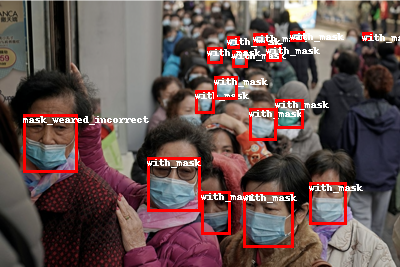

In [35]:
antns = sorted([f for f in os.listdir('val/') if f.endswith('.xml')])
idx = np.random.randint(len(antns))
filename, boxes, labels = parse_xml(os.path.join('val/', antns[idx]))
image = Image.open(os.path.join('val/',filename))
draw = ImageDraw.Draw(image)
for i, ibox in enumerate(boxes):
    draw.rectangle([(ibox[0], ibox[1]), (ibox[2], ibox[3])], outline='red', width=3)
    draw.text((ibox[0], ibox[1]), text = class_num2str[labels[i]])
image